## 1. Basic Design of the Model
1. Output of the model: 0 or 1 (Binary Classification)
2. Hypothesis to be tested: $Z = W \cdot X + b$
3. Activation Function: $\frac{1}{1 + e^{-x}} $ (Signmoid Function)

## 2. Import Packages

1. numpy
2. matplotlib
3. seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Next Libraries are unimportant, they just make everyhting look better

import matplotlib.style as style
import seaborn as sns

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

## 3. Loading the dataset


In [74]:
dataset = np.load('dataset.npz', encoding='ASCII')
## Get the numpy arrays from the dictionary
X_train = dataset['X_train']
Y_train = dataset['Y_train']
X_test  = dataset['X_test']
Y_test  = dataset['Y_test']

In [94]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 8000)
(1, 8000)
(784, 2000)
(1, 2000)


Label: cat


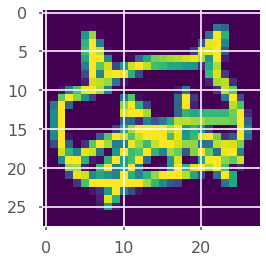

In [75]:
idx = np.random.randint(X_train.shape[1])

plt.imshow(X_train[:, idx].reshape(28, 28))

label = "cat" if Y_train[:, idx][0] else "bat"
print(f"Label: {label}")

## 4. Normalizing the data

Normalizing the data with the following equation:

$$ X_{norm} = \frac {X - X_{min}}{X_{max} - X_{min}} $$

For this pixel data, $X_{max} = 255$ and $X_{min} = 0$

> After running the next cell, go back and view the raw array again

In [76]:
## Normalizing the training and testing data
X_min = 0
X_max = 255
X_train = X_train / X_max
X_test = X_test / X_max

## 5. Helper functions for the Model:

### Sigmoid Function and Initialize Parameters function 

In [77]:
def sigmoid(z):
    """
    Computes the element sigmoid of scalar or numpy array(element wise)
    
    Arguments:
        z: Scalar or numpy array
    
    Returns:
        s: Sigmoid of z (element wise in case of Numpy Array)
    """
    s = 1/(1+np.exp(-z))
    
    return s

In [78]:
def initialize_parameters(n_x):
    """
    Initializes w to a zero vector, and b to a 0 with datatype float 
    
    Arguments:
        n_x: Number of features in each sample of X
    
    Returns:
        w: Initialized Numpy array of shape (1, n_x) (Weight)
        b: Initialized Scalar (bias)
    """

    w = np.full((1,X_train.shape[0]),0)
    b = 0
    
    return w, b


Here is a summary of the equations for Forward Propagation and Backward Propagation we have used so far:

For m training examples $ X_{train} $ and $ Y_{train} $:

### 5.1 Forward Propagation

$$ Z^{(i)} = w \cdot X_{train}^{(i)} + b $$

$$ \hat Y^{(i)} = A^{(i)} = \sigma(Z^{(i)}) = sigmoid(Z^{(i)}) $$

$$ \mathcal{L}(\hat Y^{(i)}, Y_{train}^{(i)}) = \mathcal{L}(A^{(i)}, Y_{train}^{(i)}) = -[Y_{train}^{(i)} \log(A^{(i)}) + (1 - Y_{train}^{(i)}) \log(1 - A^{(i)})] $$

$$ J = \frac{1}{m} \sum_1^m \mathcal{L} (A^{(i)}, Y_{train}^{(i)}) $$


### 5.2 Backward Propagation - Batch Gradient Descent

$$ \frac{\partial J}{\partial w} = \frac{1}{m} (A - Y) \cdot X^T $$

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_1^m (A - Y) $$


> Note: $ \frac{\partial J}{\partial w} $ is represented as dw, and $ \frac{\partial J}{\partial b}$ is represented as db


In [79]:
def compute_cost(A, Y, m):
    """
    Calculates the Cost using the Cross Entropy Loss
    
    Arguments:
        A: Computer Probabilities, numpy array
        Y: Known Labels, numpy array
        
    Returns:
        cost: The computed Cost
    """
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m
    
    return np.squeeze(cost)

In [80]:
def propagate(w, b, X, Y):
    """
    Performs forward and backward propagation for the Logistic Regression model
    
    Arguments:
        w: The Weight Matrix of dimension (1, n_x)
        b: Bias
        X: Input Matrix, with shape (n_x, m)
        Y: Label Matrix of shape (1, m)
        
    Returns:
        dw: Gradient of the weight matrix
        db: Gradient of the bias
        cost: Cost computed on Calculated Probability, and output Label
    """
    m = X.shape[1]
    
    A = sigmoid((w @ X)+b)
    cost = compute_cost(A, Y, m)
    dw = (np.dot(X,(A-Y).T).T)/m
    db = (np.sum(A-Y))/m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    return dw, db, cost
    

### 5.3 Optimization

For a parameter $ \theta $, the gradient descent update rule is given by:
$$ \theta := \theta - \alpha \frac{\partial J}{\partial \theta} $$

where $\alpha$ is the learning rate

In [81]:
def fit(w, b, X, Y, num_iterations, learning_rate, print_freq=100):
    """
    Given the parameters of the model, fits the model corresponding to the given Input Matrix aand output labels, by performing batch gradient descent for given number of iterations.
    
    Arguments:
        w: The Weight Matrix of dimension (1, n_x)
        b: Bias
        X: Input Matrix, with shape (n_x, m)
        Y: Label Matrix of shape (1, m)
        num_iterations: The number of iteratios of bgd to be performed
        print_freq: Frequency of recording the cost
    Returns:
        w: Optimized weight matrix
        b: optimized bias
        costs: print the cost at frequency given by print_freq, no prints if freq is 0
    """
    
    costs = []
    for i in range(num_iterations):
        ## 1. Calculate Gradients and cost
        dw, db, cost = propagate(w, b, X, Y)
        
        costs.append(cost)
            
        if print_freq and i % print_freq == 0:
            print(f"Cost after iteration {i}: {cost}")
                
        ## 2. Update parameters
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)

            
    return w, b, costs
        

### 5.4 Prediction
Using the following equation to determine the class that a given sample belongs to:

$$
\begin{equation}
    Y_{prediction}^{(i)} =
    \begin{cases} 
        1 \text{, if } \hat Y^{(i)} \ge 0.5\\
        0 \text{, if } \hat Y^{(i)} \lt 0.5\\
    \end{cases}
\end{equation}
$$


In [82]:
def predict(w, b, X):
    """
    Predicts the class which the given feature vector belongs to given Weights and Bias of the model
    
    Arguments:
        w: The Weight Matrix of dimension (1, n_x)
        b: Bias
        X: Input Matrix, with X.shape[0] = n_X
    Returns:
        Y_prediction: Predicted labels
    """
    
    m = X.shape[1]
    Y_prediction = np.full((1,m),0)
    A = sigmoid((w @ X) + b)
    Y_prediction = (A >= 0.5) * 1.0
    
    return Y_prediction

## 6. Building the Model

Now we have assembled all the individual pieces required to create the Logistic Regression model.
Next function is creating the model and calculating its train and test accuracy. 



In [92]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_freq):
    """
    Creates a model and fit it to the train and test data. Use this model to compute the train and test accuracy after 2500 iterations
    
    Arguments:
        X_train: Training Data X
        Y_train: Training Data Y
        X_test: Testing Data X
        Y_test: Testing data Y
        num_iterations: Number of iterations of bgd to perform
        learning_rate: Learning Rate of the model
        print_freq: Frequency of recording the cost
    Returns:
        -None-
    """
    
    w, b = initialize_parameters(X_train.shape[0])
    w, b, costs = fit(w, b, X_train, Y_train, num_iterations, learning_rate, print_freq)
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    costs = np.squeeze(costs)
    

    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100} %")
    
    plt.plot(costs)
    
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title(f"Learning rate = {learning_rate}")
    plt.show()
       

Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.3433501584110635
Cost after iteration 200: 0.32897409842493286
Cost after iteration 300: 0.32326638115534495
Cost after iteration 400: 0.31970436704308053
Cost after iteration 500: 0.3170647019548738
Cost after iteration 600: 0.3149517208351771
Cost after iteration 700: 0.3131873793654107
Cost after iteration 800: 0.3116736166745069
Cost after iteration 900: 0.31034955432445077
Cost after iteration 1000: 0.3091744749560511
Cost after iteration 1100: 0.30811971405331506
Cost after iteration 1200: 0.30716429510898796
Cost after iteration 1300: 0.30629238107355694
Cost after iteration 1400: 0.30549169980607177
Cost after iteration 1500: 0.30475252920478246
Cost after iteration 1600: 0.3040670204069449
Cost after iteration 1700: 0.3034287332047725
Cost after iteration 1800: 0.3028323089289211
Cost after iteration 1900: 0.30227323480515816
train accuracy: 87.2875 %
test accuracy: 87.3 %


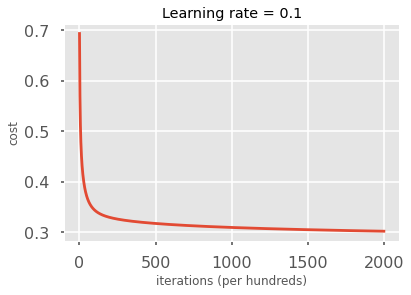

In [93]:
model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.1, print_freq=100)